You are tasked with locating 3 ambulances in Stillwater. There are 5 sites under consideration. Ideally, the 3 ambulances should serve all 6 landmarks below within a 3-minute response time. However, this might not be possible, so you decide to maximize the number of them that are covered. 

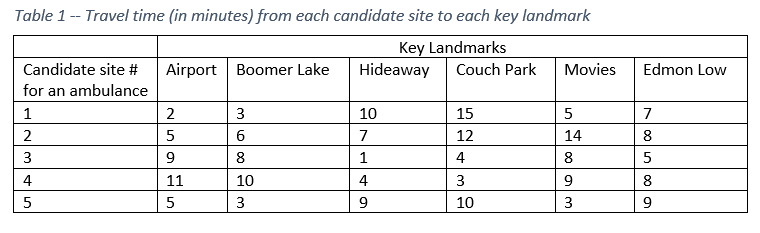

In [1]:
time_min = { (1,'Airport') : 2,
           (1,'Boomer Lake') : 3,
           (1,'Hideaway') : 10,
           (1,'Couch Park') : 15,
           (1,'Movies') : 5,
           (1,'Edmon Low') : 7,
          (2,'Airport') : 5,
           (2,'Boomer Lake') : 6,
           (2,'Hideaway') : 7,
           (2,'Couch Park') : 12,
           (2,'Movies') : 14,
           (2,'Edmon Low') : 8,
          (3,'Airport') : 9,
           (3,'Boomer Lake') : 8,
           (3,'Hideaway') : 1,
           (3,'Couch Park') : 4,
           (3,'Movies') : 8,
           (3,'Edmon Low') : 5,
          (4,'Airport') : 11,
           (4,'Boomer Lake') : 10,
           (4,'Hideaway') : 4,
           (4,'Couch Park') : 3,
           (4,'Movies') : 9,
           (4,'Edmon Low') : 8,
          (5,'Airport') : 5,
           (5,'Boomer Lake') : 3,
           (5,'Hideaway') : 9,
           (5,'Couch Park') : 10,
           (5,'Movies') : 3,
           (5,'Edmon Low') : 9 }

In [2]:
sites = { i for (i,j) in time_min.keys() }
print("Sites =",sites)

landmarks = { j for (i,j) in time_min.keys() }
print("Landmarks =",landmarks)

k = 3
print("Number of ambulances to site =",k)

Sites = {1, 2, 3, 4, 5}
Landmarks = {'Airport', 'Couch Park', 'Hideaway', 'Movies', 'Boomer Lake', 'Edmon Low'}
Number of ambulances to site = 3


In [3]:
close_sites = { j : list() for j in landmarks }

for (i,j) in time_min.keys():
    if time_min[i,j] <= 3:
        close_sites[j].append(i)
        
for j in landmarks:
    print("The sites close to landmark",j,"are:",close_sites[j])

The sites close to landmark Airport are: [1]
The sites close to landmark Couch Park are: [4]
The sites close to landmark Hideaway are: [3]
The sites close to landmark Movies are: [5]
The sites close to landmark Boomer Lake are: [1, 5]
The sites close to landmark Edmon Low are: []


In [4]:
import gurobipy as gp
from gurobipy import GRB

In [5]:
m = gp.Model()
x = m.addVars( sites, vtype=GRB.BINARY )     # x[i]=1 if place ambulance at site i
y = m.addVars( landmarks, vtype=GRB.BINARY ) # y[j]=1 if landmark j is covered

Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-01


In [6]:
# Objective: maximize the number of landmarks covered
m.setObjective( gp.quicksum(y), GRB.MAXIMIZE )

In [7]:
# Constraint: site k ambulances
m.addConstr( gp.quicksum(x) == k )

# Constraints: landmark j is covered only if an ambulance is sited nearby
m.addConstrs( gp.quicksum( x[i] for i in close_sites[j] ) >= y[j] for j in landmarks )

m.update()

In [8]:
# Solve
m.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 11 columns and 17 nonzeros
Model fingerprint: 0x4b736af2
Variable types: 0 continuous, 11 integer (11 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 3e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 7 rows and 11 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 4 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.000000000000e+00, best bound 4.000000000000e+00, gap 0.0000%


In [9]:
chosen_sites = [ i for i in sites if x[i].x > 0.5 ]
print("Chosen sites:",chosen_sites)

landmarks_covered = [ j for j in landmarks if y[j].x > 0.5 ]
print("Landmarks covered:",landmarks_covered)

Chosen sites: [1, 4, 5]
Landmarks covered: ['Airport', 'Couch Park', 'Movies', 'Boomer Lake']
